In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df= pd.read_csv('reg_dummy.csv')

In [3]:
df['skill'].value_counts()

Java    13
ML      12
BI       9
Name: skill, dtype: int64

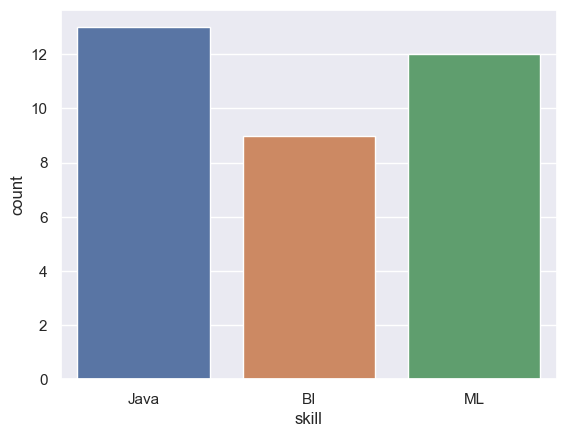

In [4]:
sns.countplot(x=df['skill'],data=df);

In [5]:
df.head(10)

,exp,skill,salary,gender
0,2.0,Java,350000,M
1,3.0,BI,360000,M
2,4.0,BI,400000,M
3,5.0,ML,900000,F
4,5.6,Java,450000,M
5,4.6,BI,750000,M
6,5.6,Java,450000,F
7,7.0,Java,770000,F
8,8.0,ML,1400000,F
9,9.9,Java,900000,M


In [6]:
df.describe().T



,count,mean,std,min,25%,50%,75%,max
exp,34.0,7.761765e+00,4.956050e+00,2.0,4.9,6.0,9.9,24.0
salary,34.0,1.221912e+06,1.324410e+06,120000.0,450000.0,760000.0,1500000.0,6500000.0


In [8]:
df.describe(include='object').T

,count,unique,top,freq
skill,34,3,Java,13
gender,34,2,M,17


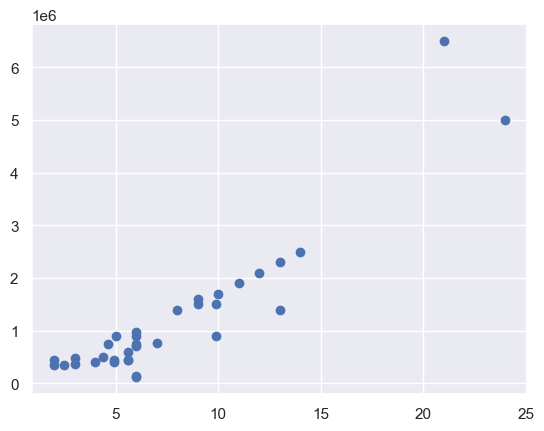

In [7]:
plt.scatter(df.exp,df.salary);

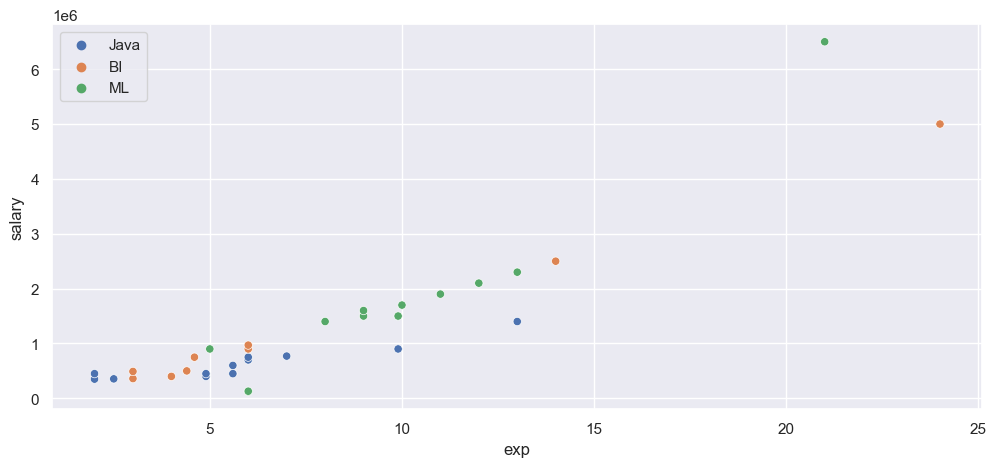

In [9]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df.exp,y=df.salary,hue=df.skill);
plt.legend(loc='upper left');


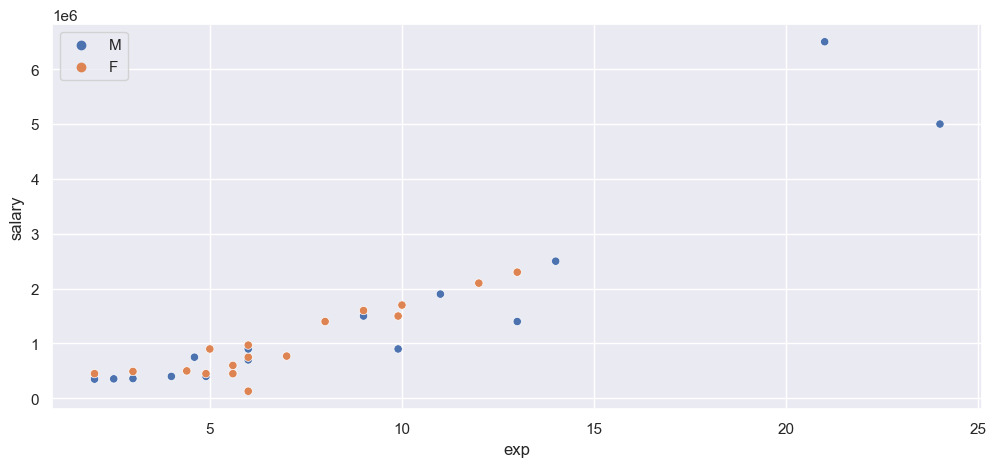

In [10]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df.exp,y=df.salary,hue=df.gender)
plt.legend(loc='upper left');


In [11]:
len(df)

34

In [12]:
import statsmodels.api as sm

In [13]:
len(df)

34

In [14]:
df.head()

,exp,skill,salary,gender
0,2.0,Java,350000,M
1,3.0,BI,360000,M
2,4.0,BI,400000,M
3,5.0,ML,900000,F
4,5.6,Java,450000,M


In [15]:
x1= df.iloc[:,[0,1,3]]
x1.head()

,exp,skill,gender
0,2.0,Java,M
1,3.0,BI,M
2,4.0,BI,M
3,5.0,ML,F
4,5.6,Java,M


In [16]:
y= df.iloc[:,2]
y.head()

0    350000
1    360000
2    400000
3    900000
4    450000
Name: salary, dtype: int64

In [17]:
x1.head()

,exp,skill,gender
0,2.0,Java,M
1,3.0,BI,M
2,4.0,BI,M
3,5.0,ML,F
4,5.6,Java,M


In [18]:
X= sm.add_constant(x1)

In [19]:
X.head()

,const,exp,skill,gender
0,1.0,2.0,Java,M
1,1.0,3.0,BI,M
2,1.0,4.0,BI,M
3,1.0,5.0,ML,F
4,1.0,5.6,Java,M


In [20]:
X= pd.get_dummies(X,drop_first=True)

In [21]:
model=sm.OLS(y,X).fit()

In [22]:
len(df)

34

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     41.78
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           1.23e-11
Time:                        19:24:15   Log-Likelihood:                -494.52
No. Observations:                  34   AIC:                             999.0
Df Residuals:                      29   BIC:                             1007.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.359e+05   2.56e+05     -2.092      0.045   -1.06e+06    -1.2e+04
exp         2.397e+05   2.13e+04     11.229      0.000    1.96e+05    2.83e+05
skill_Java -2.435e+05   2.39e+05     -1.018      0.317   -7.33e+05    2.46e+05
skill_ML   -6.332e+04   2.57e+05     -0.246      0.807   -5.89e+05    4.63e+05
gender_M    2.592e+04   2.01e+05      0.129      0.898   -3.85e+05    4.37e+05
==============================================================================
Omnibus:                       26.827   Durbin-Watson:                   1.415
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.595
Skew:                           1.681   Prob(JB):                     1.27e-15
Kurtosis:                       9.093   Cond. No.                         36.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We can see that most females are paid more than males then why is the P values on gender_M so high?

The females are marginally paid higher than males but we have a very few such instances where we have males and females with same experience and then there are two outliers who have high salary who are males which tilts it in males favour. *** Important note*** : If the difference between salary of males and females have been considerable higher with all othere features same then the P values would have been smaller. Right now the difference is just marginal to be statistically significant.  

### Null Hypothesis Salary of male is not different than female